# Load Data

In [1]:
import pandas as pd
df = pd.read_csv('spam.csv')

In [2]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
text_data = df.Message.copy()
target = df.Category.apply(lambda x: 1 if x=='spam' else 0)

In [4]:
target.value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(text_data, target, 
                                                          stratify = target, random_state=1)

<font color='red'>Question 1.1:</font> What are in text_train, text_test, y_train, y_test?

The train_test_split function from sklearn.model_selection module splits the data into random train and test subsets.

text_train: Training set of text data
text_test: Testing set of text data 
y_train: A list of corresponding target labels for training the model 
y_test: A list of corresponding target labels for testing the model

By default, it divides the data so that 75% is used for training and 25% is used for testing. 
The stratify parameter is set to target, which means that the splitting will be performed in a way that preserves the proportion of classes in target in the training and testing sets.

# Process Text Data

In [6]:
## You might need to run the following two lines to download stopwords for NLTK
# import nltk
# nltk.download('stopwords')

In [7]:
from nltk.corpus import stopwords

In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<font color='red'>Question 1.2:</font> What are stopwords? Why do we need to remove them?

The words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”.

Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information. In order words, we can say that the removal of such words does not show any negative consequences on the model we train for our task.

Removal of stop words definitely reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training.

In [9]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer(ignore_stopwords=False)

In [10]:
stemmer.stem('dream')

'dream'

In [11]:
stemmer.stem('dreaming')

'dream'

In [12]:
stemmer.stem('dreamed')

'dream'

<font color='red'>Question 1.3:</font> What is stemming? Why is it helpful?

Stemming is a natural language processing technique that lowers inflection in words to their root forms, hence aiding in the preprocessing of text, words, and documents for text normalization. 
It reduces the size of the dictionary (number of words used in the corpus) two or three-fold (of even more for languages with many flections like French, where a single stem can generate dozens of words in case of verbs for instance).

Having the same corpus, but less input dimensions, ML will work better. Recall should really be better.

Simply put stemming is a technique used to extract the base form of the words by removing affixes from them.

In [13]:
import re
def stem_tokenizer(text):
    stemmer = EnglishStemmer(ignore_stopwords=True)
    words = re.sub(r"[^A-Za-z0-9\-]", " ", text).lower().split()
    words = [stemmer.stem(word) for word in words]
    return words 

<font color='red'>Assignment 1.1:</font> Use **CountVectorizer** to transform text_train to **X_train**, and text_test to **X_test**. Hint: use stop_words = stopwords.words('english') and tokenizer = stem_tokenizer.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [15]:
vect = CountVectorizer(tokenizer = stem_tokenizer, stop_words = stopwords.words('english'))

X_train = vect.fit_transform(text_train)
X_test = vect.transform(text_test)

<font color='red'>Question 1.4:</font> How does **CountVectorizer** work? What is **Bag of Words**?

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.
Inside CountVectorizer, the words are not stored as strings. Rather, they are given a particular index value.

Bag of words is an algorithm that transforms the text into fixed-length vectors. This is possible by counting the number of times the word is present in a document. The word occurrences allow to compare different documents and evaluate their similarities for applications, such as search, document classification, and topic modeling.

The reason for its name, “Bag-Of-Words”, is due to the fact that it represents the sentence as a bag of terms. It doesn’t take into account the order and the structure of the words, but it only checks if the words appear in the document.

# Text Classifier

<font color='red'>Assignment 1.2:</font> build a random forest classification model to predict whether each text message is "spam" (target = 1) or "ham" (target = 0). Do this for both training data and test data. Print the accuracy, precision, recall, and F1 scores.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier()

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Scores for testing data")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print()

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Scores for training data")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Scores for testing data
Accuracy: 0.9770279971284996
Precision: 1.0
Recall: 0.8288770053475936
F1 Score: 0.9064327485380117

Scores for training data
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# TFIDF

<font color='red'>Assignment 1.3:</font> Instead of **CountVectorizer**, process text data using **TfidfVectorizer**. Then use random forest classifier to predict whether each text message is "spam" (target = 1) or "ham" (target = 0). Check how the model performs compared with previous results. Hint: besides the previous parameters, try max_df=0.5, min_df=5, ngram_range=(1, 3) in TfidfVectorizer. 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tf_idf_model  = TfidfVectorizer(tokenizer = stem_tokenizer, stop_words = stopwords.words('english')\
                               ,max_df=0.5, min_df=5, ngram_range=(1, 3) )

X_tf_train = tf_idf_model.fit_transform(text_train)
X_tf_test = tf_idf_model.transform(text_test)

In [33]:
rfc_tf = RandomForestClassifier()

In [35]:
rfc_tf.fit(X_tf_train, y_train)
y_test_pred = rfc_tf.predict(X_tf_test)
y_train_pred = rfc_tf.predict(X_tf_train)

In [36]:

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Scores for testing data")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print()

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Scores for training data")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Scores for testing data
Accuracy: 0.9820531227566404
Precision: 1.0
Recall: 0.8663101604278075
F1 Score: 0.9283667621776505

Scores for training data
Accuracy: 0.9997607083034219
Precision: 1.0
Recall: 0.9982142857142857
F1 Score: 0.9991063449508489


<font color='red'>Question 1.5:</font> What does TFIDF mean? Why is it useful?

TF-IDF vectorizes/scores a word by multiplying the word’s Term Frequency (TF) with the Inverse Document Frequency (IDF).

Term Frequency: TF of a term or word is the number of times the term appears in a document compared to the total number of words in the document.

Inverse Document Frequency: IDF of a term reflects the proportion of documents in the corpus that contain the term. Words unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).

The TF-IDF of a term is calculated by multiplying TF and IDF scores.

Importance of a term is high when it occurs a lot in a given document and rarely in others. In short, commonality within a document measured by TF is balanced by rarity between documents measured by IDF. The resulting TF-IDF score reflects the importance of a term for a document in the corpus.

# Topic Modeling

In [31]:
tfidf = TfidfVectorizer(stop_words='english')

In [32]:
X_train = tfidf.fit_transform(text_train)
X_train.shape

(4179, 7112)

In [33]:
X_test = tfidf.transform(text_test)
X_test.shape

(1393, 7112)

In [34]:
len(tfidf.vocabulary_)

7112

<font color='red'>Question 1.6:</font> What is Latent Semantic Analysis (LSA)? What is the relationship between LSA and PCA?

LSA is one of the most popular Natural Language Processing (NLP) techniques for trying to determine themes within text mathematically. LSA is an unsupervised learning technique that rests on two pillars:

1. The distributional hypothesis, which states that words with similar meanings appear frequently together
2. Singular Value Decomposition is essentially a matrix factorization technique. In this method, any matrix can be decomposed into three parts as shown below. 
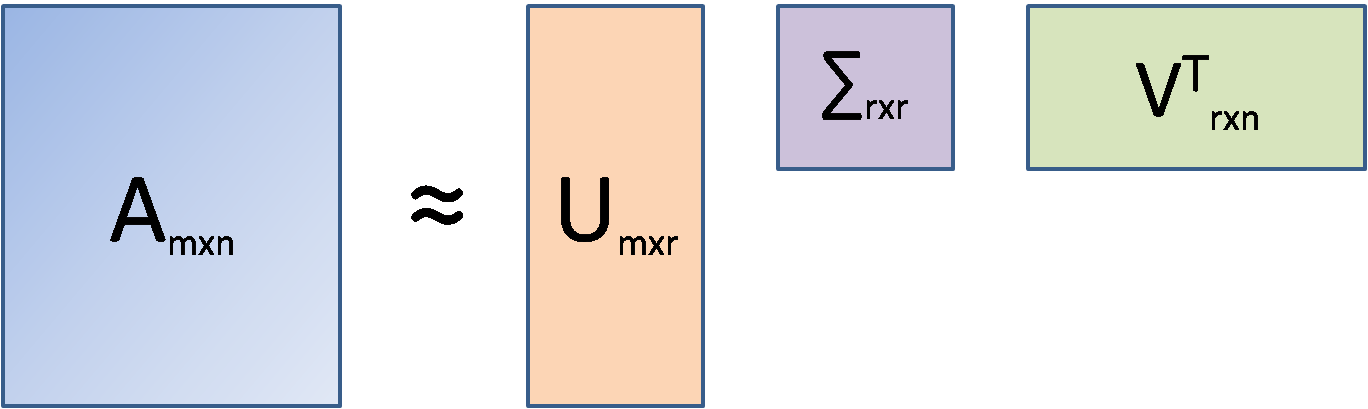
Here, A is the document-term matrix (documents in the rows(m), unique words in the columns(n), and frequencies at the intersections of documents and words). The U matrix is the document-aspect matrix, V is the word-aspect matrix, and ∑ is the diagonal matrix of the singular values.

Documents are then compared by cosine similarity between any two columns. Values close to 1 represent very similar documents while values close to 0 represent very dissimilar documents

There are a number of drawbacks to Latent Semantic Analysis, the major one being is its inability to capture polysemy (multiple meanings of a word). The vector representation, in this case, ends as an average of all the word’s meanings in the corpus. That makes it challenging to compare documents.

Unlike PCA, SVD does not require a correlation matrix or a covariance matrix to decompose. In that sense, SVD is free from any normality assumption of data (covariance calculation assumes a normal distribution of data).

Essentially LSA is PCA applied to text data. When using SVD for PCA, it's not applied to the covariance matrix but the feature-sample matrix directly, which is just the term-document matrix in LSA. The difference is PCA often requires feature-wise normalization for the data while LSA doesn't.

<font color='red'>Bonus Assignment 1.4:</font> create a pipeline using **MaxAbsScaler** and **TruncatedSVD** to transform X_train and X_test and reduce their dimensions to 100. Assign the transformed results to transformed_X_train and transformed_X_test.


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MaxAbsScaler

pipe = Pipeline([
    ('scaler', MaxAbsScaler()),
    ('tsvd' , TruncatedSVD(n_components=100))
])



transformed_X_train = pipe.fit_transform(X_train)
transformed_X_test = pipe.transform(X_test)

<font color='red'>Bonus Assignment 1.5: </font> visualize explained variance ratio vs. number of components. What does it tell you?

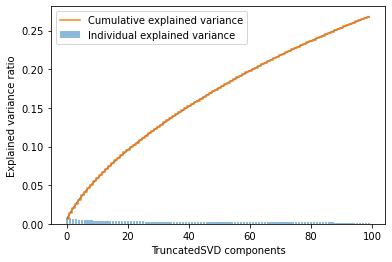

In [48]:
import numpy as np
import matplotlib.pyplot as plt
#tsvd = TruncatedSVD(n_components=100)
exp_var_ratio = pipe['tsvd'].explained_variance_ratio_

# create cumulative variance plot
cumulative_var = np.cumsum(exp_var_ratio)
fig, ax = plt.subplots()
ax.plot(cumulative_var)
ax.bar(range(len(exp_var_ratio)), exp_var_ratio, alpha=0.5, align='center', label='Individual explained variance')
ax.step(range(len(cumulative_var)), cumulative_var, where='mid', label='Cumulative explained variance')
ax.set_xlabel('TruncatedSVD components')
ax.set_ylabel('Explained variance ratio')
ax.legend(loc='best')
plt.show()

<font color='red'>Bonus Assignment 1.6: </font> Train a **RandomForestClassifier** with transformed data of 100 dimensions, then use it to make predictions. Print the accuracy score and classification report.

In [49]:
rfc = RandomForestClassifier()
rfc.fit(transformed_X_train, y_train)

RandomForestClassifier()

In [50]:
y_test_pred = rfc.predict(transformed_X_test)
y_train_pred = rfc.predict(transformed_X_train)

In [51]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Scores for testing data")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print()

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Scores for training data")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Scores for testing data
Accuracy: 0.9791816223977028
Precision: 0.9876543209876543
Recall: 0.8556149732620321
F1 Score: 0.9169054441260746

Scores for training data
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


<font color='red'>Bonus Assignment 1.7: </font> train and predict using only the first 4 components. How does the result compare with above? Why?